# 1. Import libraries

In [1]:
# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#installing libraries
!pip install category_encoders
!pip install shap

# data analysis
import seaborn as sns

# data processing
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score

# explainability
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.7 MB/s eta 0:00:00


# 2. Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/fraud.csv')

In [4]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

# 3. Exploratory Data Analysis

Important to compair some features against the target

In [6]:
import seaborn as sns

In [11]:
data["FraudFound"].value_counts(normalize=True,)

,proportion
FraudFound,
No,0.940143
Yes,0.059857


<Axes: xlabel='FraudFound', ylabel='Deductible'>

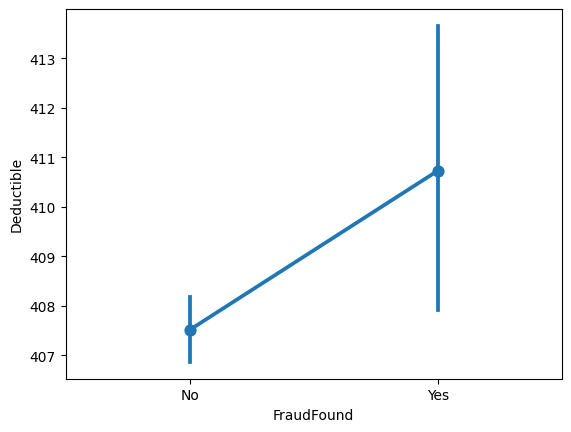

In [7]:
sns.pointplot(data,y="Deductible",x="FraudFound")

<Axes: xlabel='Age', ylabel='Density'>

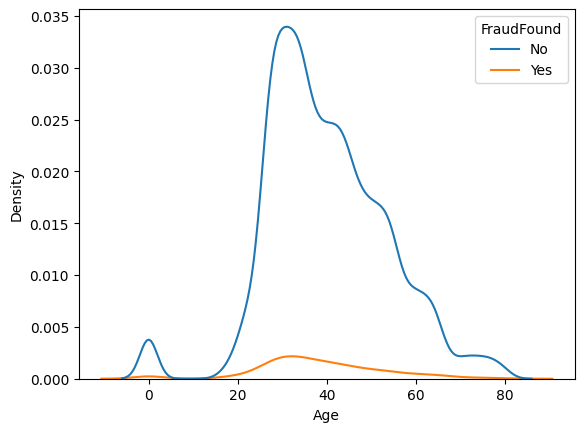

In [8]:
sns.kdeplot(data,x="Age",hue="FraudFound")

<Axes: xlabel='VehicleCategory', ylabel='count'>

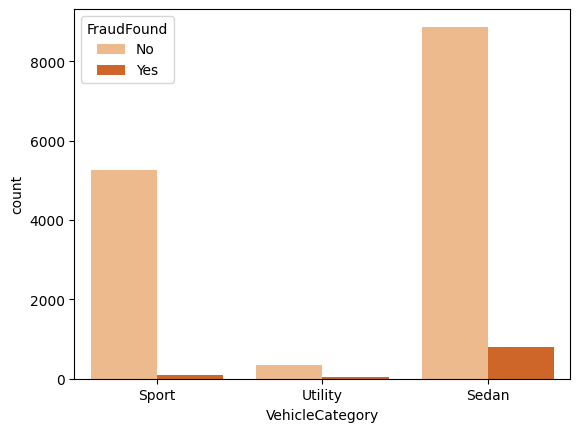

In [9]:
sns.countplot(data,x="VehicleCategory",hue="FraudFound",palette="Oranges")

In [10]:
data.Sex.value_counts(normalize= True)

,proportion
Sex,
Male,0.843061
Female,0.156939


<Axes: xlabel='Sex', ylabel='Age'>

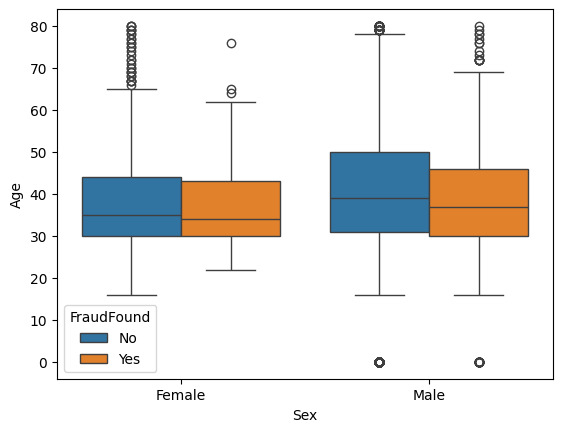

In [11]:
sns.boxplot(data, y='Age',x="Sex",hue="FraudFound")

In [12]:
data.MaritalStatus.value_counts(normalize= True)

,proportion
MaritalStatus,
Married,0.689040
Single,0.303761
Divorced,0.004929
Widow,0.002270


<Axes: xlabel='FraudFound', ylabel='Count'>

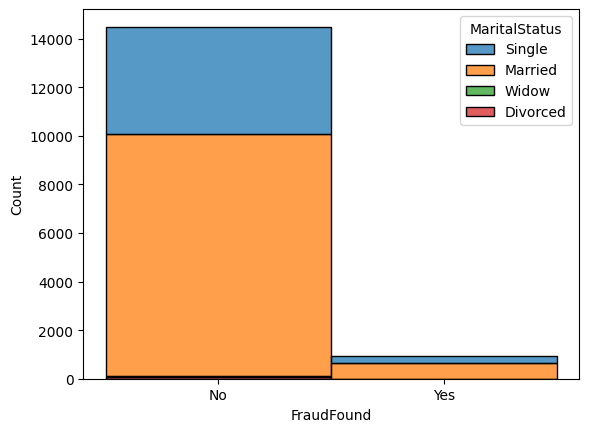

In [13]:
sns.histplot(data, x='FraudFound',hue="MaritalStatus",multiple="stack")

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

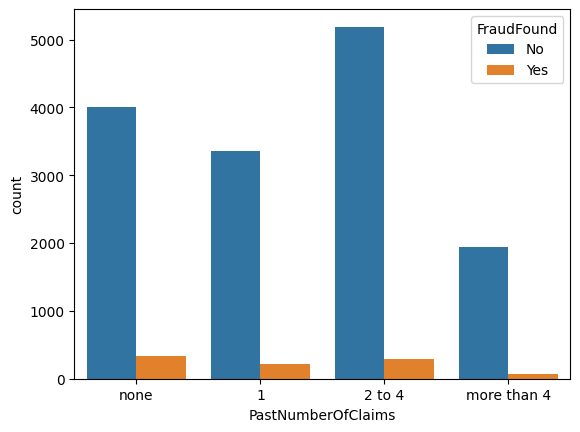

In [14]:
sns.countplot(data,x="PastNumberOfClaims",hue="FraudFound")

<Axes: xlabel='Fault', ylabel='count'>

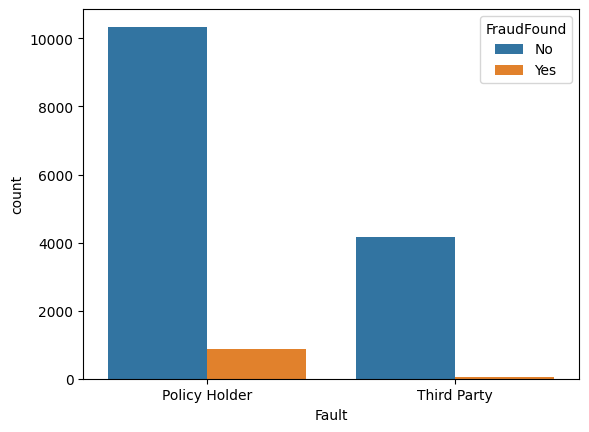

In [15]:
sns.countplot(data,x="Fault",hue="FraudFound")

<Axes: xlabel='count', ylabel='NumberOfCars'>

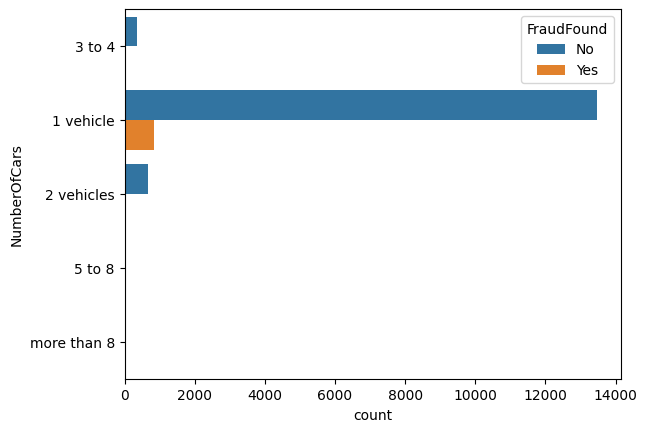

In [16]:
sns.countplot(data,y="NumberOfCars",hue="FraudFound")

<Axes: xlabel='BasePolicy', ylabel='Age'>

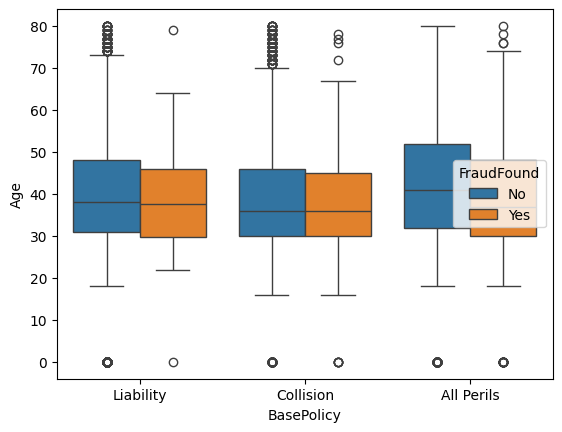

In [17]:
sns.boxplot(data, x="BasePolicy", y="Age",hue="FraudFound")

<Axes: xlabel='Count', ylabel='VehiclePrice'>

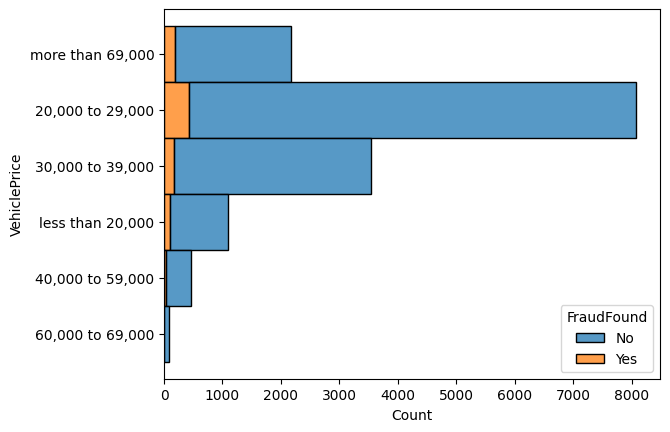

In [18]:
sns.histplot(data, y="VehiclePrice",hue="FraudFound", multiple="stack")


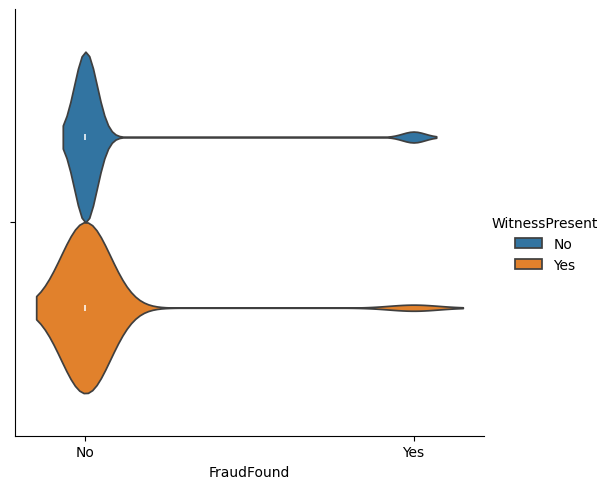

In [19]:
sns.catplot(data,x="FraudFound",hue="WitnessPresent",kind="violin")

# 4. Data Processing

## Data Cleaning

**Null or Duplicated Values**: There are no null or duplicated values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [21]:
data['PolicyNumber'].nunique()

15420

## Feature Engineering

In [22]:
data["VehiclePrice"].value_counts().index

Index(['20,000 to 29,000', '30,000 to 39,000', 'more than 69,000',
       'less than 20,000', '40,000 to 59,000', '60,000 to 69,000'],
      dtype='object', name='VehiclePrice')

In [23]:
new_data =data.copy()

**New Feature 1**

New vehicle categories associated with the price. Affordable, Medium-End, High-End, Deluxe

In [24]:
new_data['VehiclePrice']=new_data["VehiclePrice"].map({"less than 20,000":"Affordable","20,000 to 29,000":"Medium-End","30,000 to 39,000":"Medium-End","40,000 to 59,000":"High-End","60,000 to 69,000":"High-End","more than 69,000":"Deluxe"})

In [25]:
new_data["VehiclePrice"].value_counts()

,count
VehiclePrice,
Medium-End,11612
Deluxe,2164
Affordable,1096
High-End,548


**New Feature 2**

 Difference in the month of the accident vs the claim. We'll check if there's any pattern associated with this time range. First we convert the month names to numbers

In [26]:
new_data["Month"].value_counts()

,count
Month,
Jan,1411
May,1367
Mar,1360
Jun,1321
Oct,1305
Dec,1285
Apr,1280
Feb,1266
Jul,1257


In [27]:
new_data["MonthClaimed"].value_counts()

,count
MonthClaimed,
Jan,1446
May,1411
Mar,1348
Oct,1339
Jun,1293
Feb,1287
Nov,1285
Apr,1271
Sep,1242


In [28]:
new_data["Month"]=new_data["Month"].map({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12})
new_data["MonthClaimed"]=new_data["MonthClaimed"].map({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12,"0":0})

In [29]:
new_data.Month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 15420 entries, 0 to 15419
Series name: Month
Non-Null Count  Dtype
--------------  -----
15420 non-null  int64
dtypes: int64(1)
memory usage: 120.6 KB


In [30]:
new_data.Month.isnull().value_counts()

,count
Month,
False,15420


In [ ]:
#data.iloc[1516]

In [ ]:
#new_data.iloc[1516]

In [31]:
new_data["DiffMonths"]=(new_data["MonthClaimed"]-new_data["Month"])

**Pattern**: If the claim occurs in the same month as the accident or within 30 days, there's a bigger chance for fraud

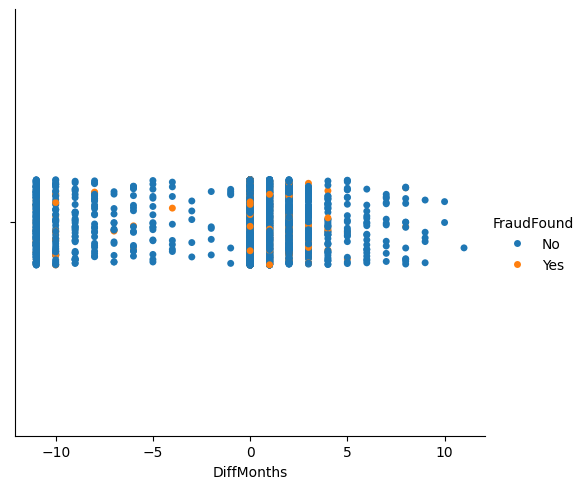

In [32]:
sns.catplot(new_data,x="DiffMonths",hue="FraudFound")

**New Feature 3**

Categories for manufacturers (column "Make")

In [33]:
data.Make.value_counts().index

Index(['Pontiac', 'Toyota', 'Honda', 'Mazda', 'Chevrolet', 'Accura', 'Ford',
       'VW', 'Dodge', 'Saab', 'Mercury', 'Saturn', 'Nisson', 'BMW', 'Jaguar',
       'Porche', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype='object', name='Make')

In [34]:
new_data['Make'] = data['Make'].map(lambda x:"Luxury" if x in ['Ferrari','Porche','Jaguar','Lexus','BMW','Mecedes','Accura'] else "Medium-End" if x in ['Toyota', 'Honda', 'Mazda','VW','Nisson'] else "Budget")

In [35]:
new_data.Make.value_counts()

,count
Make,
Medium-End,8589
Budget,6326
Luxury,505


**New Feature 4**

AgeOfPolicyHolder by ranges

In [36]:
new_data.AgeOfPolicyHolder.value_counts()

,count
AgeOfPolicyHolder,
31 to 35,5593
36 to 40,4043
41 to 50,2828
51 to 65,1392
26 to 30,613
over 65,508
16 to 17,320
21 to 25,108
18 to 20,15


In [37]:
new_data['AgeOfPolicyHolder'] = new_data['AgeOfPolicyHolder'].map(lambda x:"Adolescents" if x in ['16 to 17','18 to 20'] else "Young Adults" if x in ['21 to 25', '26 to 30'] else "Adults" if x in ["31 to 35", "36 to 40", "41 to 50","51 to 65"] else "Seniors")

In [38]:
new_data.AgeOfPolicyHolder.value_counts()

,count
AgeOfPolicyHolder,
Adults,13856
Young Adults,721
Seniors,508
Adolescents,335


# 5. Data Splitting

In [39]:
new_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,DiffMonths
0,12,5,Wednesday,Medium-End,Urban,Tuesday,1,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,No,-11
1,1,3,Wednesday,Medium-End,Urban,Monday,1,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,No,0
2,10,5,Friday,Medium-End,Urban,Thursday,11,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,1
3,6,2,Saturday,Medium-End,Rural,Friday,7,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No,1
4,1,5,Monday,Medium-End,Urban,Tuesday,2,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,1


In [43]:
estrato = ["AccidentArea", "Fault", "FraudFound"]

In [45]:
# se decide hacer el stratify con tres estratos para asegurar distribución similar en las 3 df.
train_data, tmp_data = train_test_split(new_data, test_size=0.3, stratify=new_data[estrato], random_state=42)
val_data, test_data = train_test_split(tmp_data, test_size=0.50, random_state=42)

In [46]:
len(data), len(train_data), len(val_data), len(test_data)

(15420, 10794, 2313, 2313)

In [47]:
data['Fault'].value_counts(normalize=True)

,proportion
Fault,
Policy Holder,0.728275
Third Party,0.271725


In [48]:
train_data['Fault'].value_counts(normalize=True)

,proportion
Fault,
Policy Holder,0.728275
Third Party,0.271725


In [49]:
train_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,DiffMonths
1048,6,4,Tuesday,Medium-End,Urban,Friday,7,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,1
13206,9,1,Monday,Medium-End,Urban,Tuesday,9,1,Male,Single,...,No,No,External,none,no change,1 vehicle,1996,Collision,No,0
8508,5,1,Sunday,Medium-End,Rural,Thursday,5,2,Female,Single,...,No,No,External,3 to 5,no change,1 vehicle,1995,All Perils,No,0
11398,8,5,Monday,Budget,Urban,Tuesday,8,5,Male,Married,...,No,No,External,3 to 5,no change,3 to 4,1996,Collision,No,0
9491,6,4,Monday,Budget,Urban,Wednesday,6,5,Male,Married,...,No,No,External,more than 5,no change,1 vehicle,1995,Liability,No,0


In [50]:
train_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,DiffMonths
1048,6,4,Tuesday,Medium-End,Urban,Friday,7,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,No,1
13206,9,1,Monday,Medium-End,Urban,Tuesday,9,1,Male,Single,...,No,No,External,none,no change,1 vehicle,1996,Collision,No,0
8508,5,1,Sunday,Medium-End,Rural,Thursday,5,2,Female,Single,...,No,No,External,3 to 5,no change,1 vehicle,1995,All Perils,No,0
11398,8,5,Monday,Budget,Urban,Tuesday,8,5,Male,Married,...,No,No,External,3 to 5,no change,3 to 4,1996,Collision,No,0
9491,6,4,Monday,Budget,Urban,Wednesday,6,5,Male,Married,...,No,No,External,more than 5,no change,1 vehicle,1995,Liability,No,0


## Encoding

In [51]:
data_for_encoding = train_data.copy()

In [52]:
data_for_encoding.VehicleCategory.value_counts()

,count
VehicleCategory,
Sedan,6726
Sport,3783
Utility,285


In [53]:
encoder = OneHotEncoder(cols=["VehicleCategory"], use_cat_names=True)

In [54]:
encoder.fit(data_for_encoding)

OneHotEncoder(cols=['VehicleCategory'], use_cat_names=True)

In [55]:
encoded_train_data = encoder.transform(train_data)
encoded_val_data = encoder.transform(val_data)
encoded_test_data = encoder.transform(test_data)

In [56]:
encoded_train_data[["VehicleCategory_Sedan","VehicleCategory_Sport","VehicleCategory_Utility"]].head()

,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility
1048,0,1,0
13206,1,0,0
8508,1,0,0
11398,1,0,0
9491,0,1,0


**Features for Ordinal Encoding**

* Make

* VehiclePrice

* PastNumberOfClaims

* AgeOfVehicle

* AgeOfPolicyHolder

* NumberOfCars

* BasePolicy

* Accident Area

* Sex

* Fault

* PoliceReportFiled

* WitnessPresent

* AgentType

In [57]:
encoded_train_data.Make.value_counts().index

Index(['Medium-End', 'Budget', 'Luxury'], dtype='object', name='Make')

In [58]:
encoded_train_data.VehiclePrice.value_counts().index

Index(['Medium-End', 'Deluxe', 'Affordable', 'High-End'], dtype='object', name='VehiclePrice')

In [59]:
encoded_train_data.PastNumberOfClaims.value_counts().index

Index(['2 to 4', 'none', '1', 'more than 4'], dtype='object', name='PastNumberOfClaims')

In [60]:
encoded_train_data.AgeOfVehicle.value_counts().index

Index(['7 years', 'more than 7', '6 years', '5 years', 'new', '4 years',
       '3 years', '2 years'],
      dtype='object', name='AgeOfVehicle')

In [61]:
encoded_train_data.AgeOfPolicyHolder.value_counts().index

Index(['Adults', 'Young Adults', 'Seniors', 'Adolescents'], dtype='object', name='AgeOfPolicyHolder')

In [62]:
encoded_train_data.NumberOfCars.value_counts().index

Index(['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8'], dtype='object', name='NumberOfCars')

In [63]:
encoded_train_data.BasePolicy.value_counts().index

Index(['Collision', 'Liability', 'All Perils'], dtype='object', name='BasePolicy')

In [64]:
encoded_train_data.AccidentArea.value_counts().index

Index(['Urban', 'Rural'], dtype='object', name='AccidentArea')

In [65]:
encoded_train_data.Sex.value_counts().index

Index(['Male', 'Female'], dtype='object', name='Sex')

In [66]:
encoded_train_data.Fault.value_counts().index

Index(['Policy Holder', 'Third Party'], dtype='object', name='Fault')

In [67]:
encoded_test_data.PoliceReportFiled.value_counts().index

Index(['No', 'Yes'], dtype='object', name='PoliceReportFiled')

In [68]:
encoded_train_data.WitnessPresent.value_counts().index

Index(['No', 'Yes'], dtype='object', name='WitnessPresent')

In [69]:
encoded_train_data.AgentType.value_counts().index

Index(['External', 'Internal'], dtype='object', name='AgentType')

In [70]:
ordinal_encoder = OrdinalEncoder(cols=["Make","VehiclePrice","PastNumberOfClaims","AgeOfVehicle","AgeOfPolicyHolder","NumberOfCars","BasePolicy"],
                                 mapping=[{"col": "Make", "mapping": {"Budget": 1, "Medium-End": 2, "Luxury": 3, "unknown": 0}},
                                  {"col": "VehiclePrice", "mapping": {"Affordable": 1, "Medium-End": 2, "High-End": 3,"Deluxe":4, "unknown": 0}},
                                  {"col": "PastNumberOfClaims", "mapping": {"none": 0, "1": 1, "2 to 4": 2, "more than 4": 3, "unknown": 0}},
                                  {"col":"AgeOfVehicle","mapping":{"new": 0, "2 years": 1,"3 years": 2,"4 years": 3,"5 years": 4,"6 years": 5,"7 years": 6,"more than 7": 7}},
                                  {"col":"AgeOfPolicyHolder","mapping":{"Adolescents": 0, "Young Adults": 1,"Adults": 2,"Seniors": 3}},
                                  {"col":"NumberOfCars","mapping":{"1 vehicle": 0, "2 vehicles": 1,"3 to 4": 2,"5 to 8": 3,"more than 8": 4}},
                                  {"col":"BasePolicy","mapping":{"Collision": 0, "Liability": 1,"All Perils": 2}},
                                  {"col":"FraudFound","mapping":{"No": 0, "Yes": 1}},
                                  {"col":"AccidentArea","mapping":{"Urban": 0, "Rural": 1}},
                                  {"col":"Sex","mapping":{"Male": 0, "Female": 1}},
                                  {"col":"Fault","mapping":{"Policy Holder": 0, "Third Party": 1}},
                                  {"col":"PoliceReportFiled","mapping":{"No": 0, "Yes": 1}},
                                  {"col":"WitnessPresent","mapping":{"No": 0, "Yes": 1}},
                                  {"col":"AgentType","mapping":{"External": 0, "Internal": 1}}])

In [71]:
my_encoding = ordinal_encoder.fit(encoded_train_data)
my_encoding

OrdinalEncoder(cols=['Make', 'VehiclePrice', 'PastNumberOfClaims',
                     'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfCars',
                     'BasePolicy'],
               mapping=[{'col': 'Make', 'data_type': dtype('O'),
                         'mapping': Budget        1
Medium-End    2
Luxury        3
unknown       0
dtype: int64},
                        {'col': 'VehiclePrice', 'data_type': dtype('O'),
                         'mapping': Affordable    1
Medium-End    2
High-End      3
Deluxe        4
unknown       0
dtype: int64},
                        {'col'...
                         'mapping': Male      0
Female    1
dtype: int64},
                        {'col': 'Fault', 'data_type': dtype('O'),
                         'mapping': Policy Holder    0
Third Party      1
dtype: int64},
                        {'col': 'PoliceReportFiled', 'data_type': dtype('O'),
                         'mapping': No     0
Yes    1
dtype: int64},
                        {'col': 'WitnessPresent', 'data_type': dtype('O'),
                         'mapping': No     0
Yes    1
dtype: int64},
                        {'col': 'AgentType', 'data_type': dtype('O'),
                         'mapping': External    0
Internal    1
dtype: int64}])

In [72]:
encoded_train_data = my_encoding.transform(encoded_train_data)
encoded_val_data = my_encoding.transform(encoded_val_data)
encoded_test_data = my_encoding.transform(encoded_test_data)

In [73]:
encoded_val_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,DiffMonths
3020,7,2,Tuesday,2,0,Wednesday,7,2,0,Married,...,0,0,0,none,no change,0,1994,0,0,0
5266,2,3,Tuesday,2,0,Friday,2,3,0,Married,...,0,0,0,none,no change,0,1994,0,0,0
8494,2,4,Thursday,1,0,Wednesday,3,1,0,Married,...,0,0,0,none,no change,0,1995,1,0,1
9738,7,1,Sunday,1,0,Monday,7,2,0,Married,...,0,0,0,none,no change,0,1995,0,0,0
12760,8,2,Monday,1,0,Tuesday,8,2,0,Married,...,0,0,0,none,no change,0,1996,1,0,0


#Se prueban dos modelos: Random Forest y XG Boost

# 6. Train model/Tune hyperparameters

In [74]:
# seleccion de features para el modelo
training_columns = [
    "Make", "AccidentArea", "Sex",	"Age",	"Fault", "VehicleCategory_Sedan",	"VehicleCategory_Sport",	"VehicleCategory_Utility",
"VehiclePrice", "Deductible",	"DriverRating", "PastNumberOfClaims",	"AgeOfVehicle",
"AgeOfPolicyHolder",	"PoliceReportFiled",	"WitnessPresent",	"AgentType", "NumberOfCars",	"Year",	"BasePolicy"
]

##Random Forest

In [75]:
rf_model = RandomForestClassifier(random_state=42)

In [76]:
len(encoded_train_data)
rfparam_grid = {
    'n_estimators':[250,100,150],
    'max_depth':[10,8,9],
    'min_samples_split':[50,25,40],
    'min_samples_leaf':[25,15,10],
    'class_weight':['balanced']
}

In [77]:
search = GridSearchCV(rf_model, rfparam_grid, cv=8, scoring="recall")

In [78]:
#Entrenamiento del modelo
search.fit(X=encoded_train_data[training_columns], y=encoded_train_data["FraudFound"])

GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 9],
                         'min_samples_leaf': [25, 15, 10],
                         'min_samples_split': [50, 25, 40],
                         'n_estimators': [250, 100, 150]},
             scoring='recall')

In [79]:
search.best_params_

{'class_weight': 'balanced',
 'max_depth': 8,
 'min_samples_leaf': 25,
 'min_samples_split': 50,
 'n_estimators': 100}

In [80]:
best_model_rfc = search.best_estimator_

In [81]:
search_results = pd.DataFrame(search.cv_results_)

In [82]:
RFtrain_metrics = encoded_train_data.copy()
RFtrain_metrics["Prediction_RF"] = best_model_rfc.predict(encoded_train_data[training_columns])

RFval_metrics = encoded_val_data.copy()
RFval_metrics["Prediction_RF"] = best_model_rfc.predict(encoded_val_data[training_columns])

In [83]:
print("RF Training Metrics:")
print(classification_report(y_true=RFtrain_metrics["FraudFound"], y_pred=RFtrain_metrics["Prediction_RF"]))

RF Training Metrics:
              precision    recall  f1-score   support

           0       0.99      0.60      0.75     10148
           1       0.13      0.93      0.23       646

    accuracy                           0.62     10794
   macro avg       0.56      0.77      0.49     10794
weighted avg       0.94      0.62      0.72     10794



In [84]:
print("Validation Metrics:")
print(classification_report(y_true=RFval_metrics["FraudFound"], y_pred=RFval_metrics["Prediction_RF"]))

Validation Metrics:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2182
           1       0.11      0.87      0.20       131

    accuracy                           0.61      2313
   macro avg       0.55      0.73      0.47      2313
weighted avg       0.94      0.61      0.71      2313



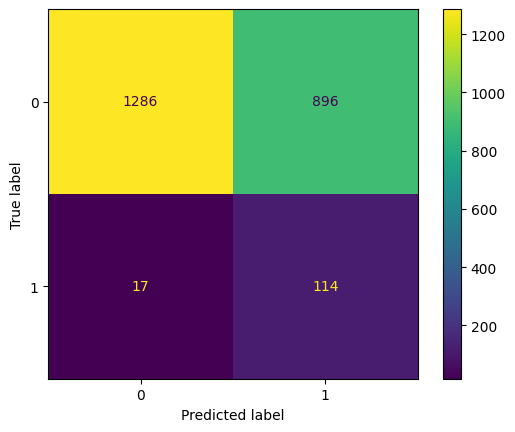

In [109]:
ConfusionMatrixDisplay.from_predictions(y_true=RFval_metrics["FraudFound"], y_pred=RFval_metrics["Prediction_RF"])

## XGBoost

In [85]:
encoded_train_data["FraudFound"].value_counts()

,count
FraudFound,
0,10148
1,646


In [86]:
10148/646

15.708978328173375

15.708978328173375

In [88]:
modelX = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [89]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1],
    'scale_pos_weight': [5, 10]
}

In [90]:
grid_search = GridSearchCV(estimator=modelX, param_grid=param_grid,
                           scoring='recall',cv=5, n_jobs=-1)

In [91]:
grid_search.fit(X=encoded_train_data[training_columns], y=encoded_train_data["FraudFound"])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:55:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'scale_pos_weight': [5, 10], 'subsample': [0.8, 1]},
             scoring='recall')

In [92]:
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'scale_pos_weight': 10, 'subsample': 1}


In [93]:
best_model = grid_search.best_estimator_

In [94]:
y_pred = best_model.predict(encoded_train_data[training_columns])

In [95]:
best_model.fit(X=encoded_train_data[training_columns], y=encoded_train_data["FraudFound"])

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:57:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
XGtrain_metrics = encoded_train_data.copy()
XGtrain_metrics["Prediction_XG"] = best_model.predict(encoded_train_data[training_columns])

XGval_metrics = encoded_val_data.copy()
XGval_metrics["Prediction_XG"] = best_model.predict(encoded_val_data[training_columns])

In [97]:
print("Training Metrics:")
print(classification_report(y_true=XGtrain_metrics["FraudFound"], y_pred=XGtrain_metrics["Prediction_XG"]))

Training Metrics:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     10148
           1       0.15      0.83      0.25       646

    accuracy                           0.70     10794
   macro avg       0.56      0.76      0.53     10794
weighted avg       0.93      0.70      0.78     10794



In [98]:
print("Validation Metrics:")
print(classification_report(y_true=XGval_metrics["FraudFound"], y_pred=XGval_metrics["Prediction_XG"]))

Validation Metrics:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2182
           1       0.13      0.75      0.22       131

    accuracy                           0.69      2313
   macro avg       0.55      0.72      0.51      2313
weighted avg       0.93      0.69      0.78      2313



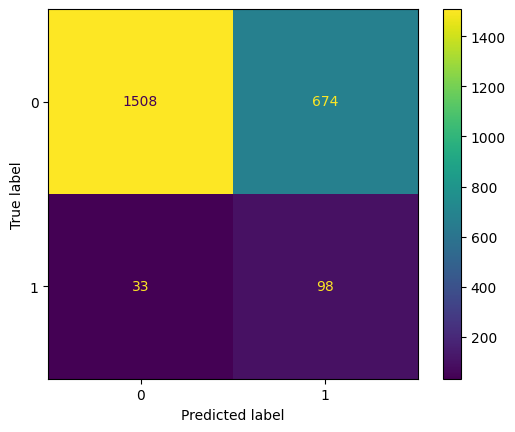

In [110]:
ConfusionMatrixDisplay.from_predictions(y_true=XGval_metrics["FraudFound"], y_pred=XGval_metrics["Prediction_XG"])

# Despues de probar los dos modelos, el RANDOM FOREST es mejor en su recall a pesar de tener menos precision y un F1 menor.

# 7. Model performance evaluation

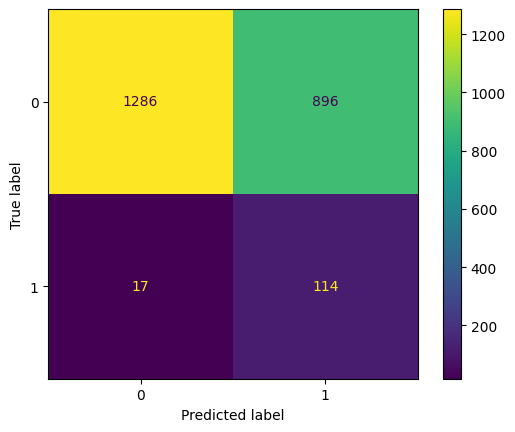

In [111]:
ConfusionMatrixDisplay.from_predictions(y_true=RFval_metrics["FraudFound"], y_pred=RFval_metrics["Prediction_RF"])

# 8. Explainability

In [112]:
explainer = shap.TreeExplainer(best_model_rfc)

In [113]:
explanation = explainer(encoded_val_data[training_columns])

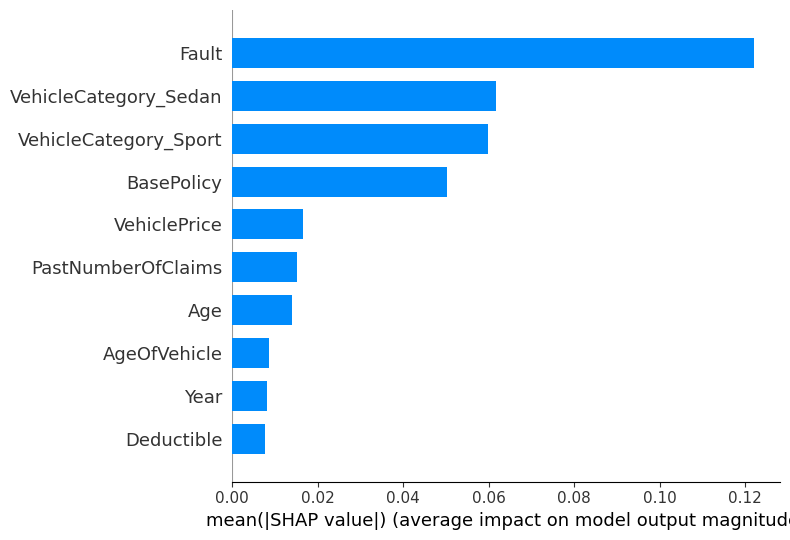

In [116]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=encoded_val_data[training_columns], plot_type="bar", max_display=10)

In [117]:
#plt.figure(figsize=(20,8))
#shap.summary_plot(explanation.values, features=encoded_val_data[training_columns], plot_type="bar", max_display=10)

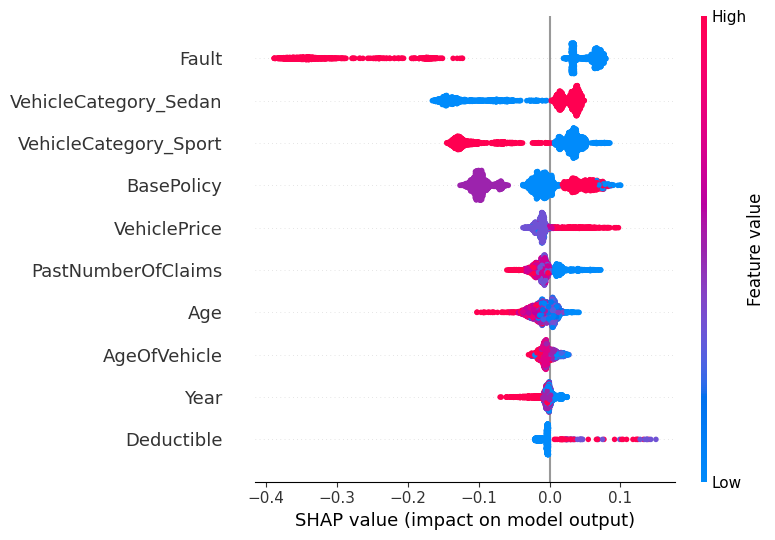

In [119]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=encoded_val_data[training_columns], max_display=10)

In [120]:
#plt.figure(figsize=(20,8))
#shap.summary_plot(explanation.values, features=encoded_val_data[training_columns], max_display=10)

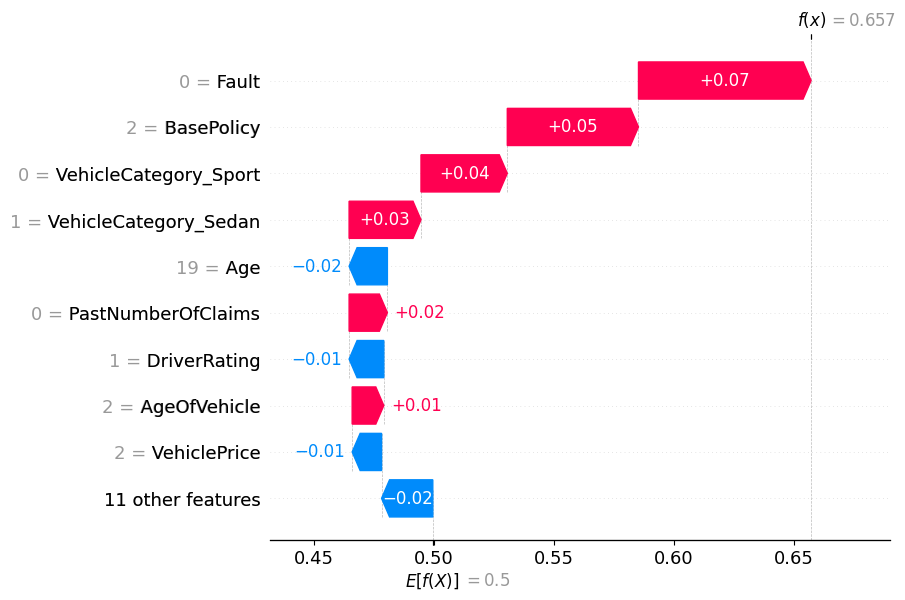

In [123]:
shap.plots.waterfall(explanation[34,:,1], max_display=10)

In [124]:
# ejemplo de fraude detectado por el modelo
#shap.plots.waterfall(explanation[34], max_display=10)

#9. KPI - Confusion Matrix

In [125]:
RFtest_metrics = encoded_test_data.copy()
RFtest_metrics["Prediction_RF"] = best_model.predict(encoded_test_data[training_columns])

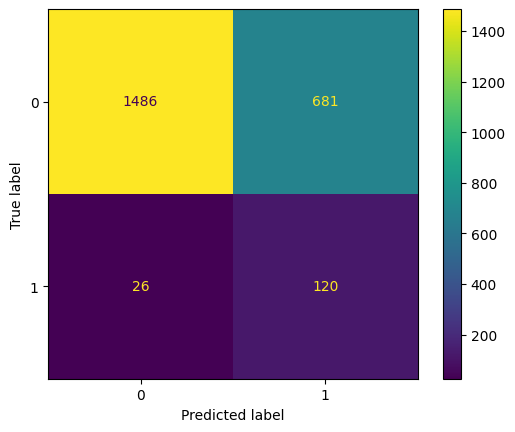

In [127]:
ConfusionMatrixDisplay.from_predictions(y_true=RFtest_metrics["FraudFound"], y_pred=RFtest_metrics["Prediction_RF"])

In [128]:
print("Test Metrics:")
print(classification_report(y_true=RFtest_metrics["FraudFound"], y_pred=RFtest_metrics["Prediction_RF"]))

Test Metrics:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      2167
           1       0.15      0.82      0.25       146

    accuracy                           0.69      2313
   macro avg       0.57      0.75      0.53      2313
weighted avg       0.93      0.69      0.77      2313

